<a href="https://colab.research.google.com/github/IlyaMikhaylovTim/hse2021_dl_project/blob/branch_1/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REPORT**

### **Description**

Эксперимент по обучению нейронной сети выполнению арифметических операций. 

$ $

**Как работает Simple NAC**

--добавить описание--

$ $

**Как работает "Complex" NAC**

--добавить описание--

$ $

**Как работает NALU**

--добавить описание--

$ $

**Как работает NAU**

--добавить описание--

$ $

**Как работает NPU**

--добавить описание--

---

### **Эксперименты / описание**

**Experiment № 1**

С помощью **Wandb** отследить изменения значений элементов обучаемых матриц $\hat{W}, \hat{M}$. Проверить, сходятся ли они к требуемому значению.

$ $

**Simple Neural Accumulator Cell (1 слой) (+, -)**

$f(x) = a = Wx$

$W = tanh(\hat{W}) \odot \sigma(\hat{M})$

Обучаемые матрицы: $\hat{W}, \hat{M}$

Заметим, что элементы $tanh(\hat{W})$ лежат в интервале $[-1, 1]$, элементы $\sigma(\hat{M})$ лежат в интервале $[0, 1]$

$ $

**1.1. addition**

Хотим выучить операцию сложения $f(x) = x_1 + x_2$ для $x = (x_1, x_2)$, где каждая компонента принадлежит интервалу $[start, finish]$, причем $start \geq 1$

$ $

В таком случае $W$ обязано принимать значение $(1, 1)^T$.
С учетом области значений $tanh(\hat{W})$ и $\sigma(\hat{M})$ можно однозначно определить их значения, необходимые для $W = (1, 1)^T$:

$tanh(\hat{W}) = \sigma(\hat{M}) = (1, 1)^T$

$ $

Тогда можно ограничить область значений $\hat{W}$ и $\hat{M}$:

$\hat{W} \approx (\geq 2, \geq 2)^T$

$\hat{M} \approx (\geq 5, \geq 5)^T$

$ $

**1.2. substraction**

Хотим выучить операцию вычитания $f(x) = x_1 - x_2$ для $x = (x_1, x_2)$, где каждая компонента принадлежит интервалу $[start, finish]$, причем $start \geq 1$

$ $

Рассуждая аналогичным пункту 1.1 образом, получим ограничения на элементы матриц $\hat{W}$ и $\hat{M}$:

$\hat{W} \approx (\geq 2, \leq -2)^T$

$\hat{M} \approx (\geq 5, \geq 5)^T$

$ $

**"Complex" Neural Accumulator Cell (1 слой) (*, /)**

$f(x) = m = exp(log(|a|) + \epsilon)$

$a = Wx$

$W = tanh(\hat{W}) \odot \sigma(\hat{M})$

Обучаемые матрицы: $\hat{W}, \hat{M}$

$ $

**1.3. multiplication**

Хотим выучить операцию умножения $f(x) = x_1 \cdot x_2$ для $x = (x_1, x_2)$, где каждая компонента принадлежит интервалу $[start, finish]$, причем $start \geq 1$

$ $

Рассуждая аналогичным пункту 1.1 образом, получим ограничения на элементы матриц $\hat{W}$ и $\hat{M}$:

$\hat{W} \approx (\geq 2, \geq 2)^T$

$\hat{M} \approx (\geq 5, \geq 5)^T$

$ $

**1.4. division**

Хотим выучить операцию деления $f(x) = x_1 / x_2$ для $x = (x_1, x_2)$, где каждая компонента принадлежит интервалу $[start, finish]$, причем $start \geq 1$

$ $

Рассуждая аналогичным пункту 1.1 образом, получим ограничения на элементы матриц $\hat{W}$ и $\hat{M}$:

$\hat{W} \approx (\geq 2, \leq -2)^T$

$\hat{M} \approx (\geq 5, \geq 5)^T$

$ $

**Experiment № 2**

С помощью **Wandb** отследить значения элементов обучаемой матрицы $G$. Проверить, сходятся ли они к требуемому значению

$ $

**Neural Arithmetic Logic Unit**

$f(x) = g \odot a + (1 - g) \odot m$

$g = \sigma(Gx)$

Заметим, что $g \in [0, 1]$

$m = exp(log(|a|) + \epsilon)$

$a = Wx$

$W = tanh(\hat{W}) \odot \sigma(\hat{M})$

Обучаемые матрицы: $G, \hat{W}, \hat{M}$

$ $

По сути $g$ решает какой из NAC'ов применить.

- При $g = 1$ применяется simple NAC. Значит, можем выучить $+$ или $-$
- При $g = 0$ применяется complex NAC. Значит, можем выучить $*$ или $/$

$ $

**2.1. Simple NAC**

Пусть хотим выучить $f(x) = x_1 (+ или -)  x_2$ для $x = (x_1, x_2)$, где каждая компонента принадлежит интервалу $[start, finish]$, причем $start \geq 1$

В идеальном случае NALU должен использовать только Simple NAC, а значит $g$ должно равняться $1$. Отсюда можем понять, что элементы матрицы $G$ должны быть как можно больше.

$ $

**2.2. "Complex" NAC**

Пусть хотим выучить $f(x) = x_1 (* или /)  x_2$ для $x = (x_1, x_2)$, где каждая компонента принадлежит интервалу $[start, finish]$, причем $start \geq 1$

В идеальном случае NALU должен использовать только "Complex" NAC, а значит $g должно равняться 0$. Отсюда можем понять, что элементы матрицы $G$ должны быть как можно меньше.

**Experiment № 3**

References:
- Neural Arithmetic Logic Unit (4.1 Simple Function Learning Task)
- Neural Power Units (4.3 Large Scale Arithmetic Task)
- Neural Arithmetic Units (4.1 ARITHMETIC DATASETS)

Сравниваемые модели:
- Multi Layer Perceptron (MLP)
обычная нейронная сеть с функцией активации RELU6
- Neural Accumulator (NAC)
- Neural Arithmetic Logic Unit (NALU)
- Neural Power Logic Unit (NPU)

Подготовка данных:
- Сгенерировать $X$: 100-мерный вектор, каждая компонента которого семплится из $U$ на отрезке $[5, 10]$.
- $a$ = сумма случайных 5 чисел из $X$
- $b$ = сумма случайных 5 чисел из $X$ (без пересечения с предыдущим пунктом)
- $(a, b)$ - для X_train
- $f(a, b)$ - для y_train, где $f$ - одна из простых арифметических операций
- Размер X_train, y_train: $500$
- Размер X_test, y_test: $50$

Train:
- Функция потерь - Mean square error
- Optimizer - `torch.optim.RMSprop`
- Кол-во итераций - 100 000

Test:
- Функция потерь - Mean abslute error
- Процесс оценивания:
    - test для оцениваемой модели
    - Инициализируется MLP 
    - Без обучения(!) в течении 100 итераций производится test MLP на данных. 
    - Берется среднее по результату по 100 итерациям
    - Итоговое значение = $\frac{тест-модели}{тест-случайной-MLP} \cdot 100$

Гиперпараметры:
- дописать все параметры моделей и т.д.

$ $

**3.1. Interpolation**

- Range = [5, 10]
- add description

$ $

**3.2. Extrapolation**

- add description

---

### **Эксперименты / результаты**

**Experiment 1**

Здесь будут графики изменения значений элементов матриц $\hat{W}, \hat{M}$, наподобии графиков ниже:
- по горизонтали: эпоха
- по вертикали: значения элементов матрицы / градиентов

(данные графики из эксперимента 3, вставлены для примера)

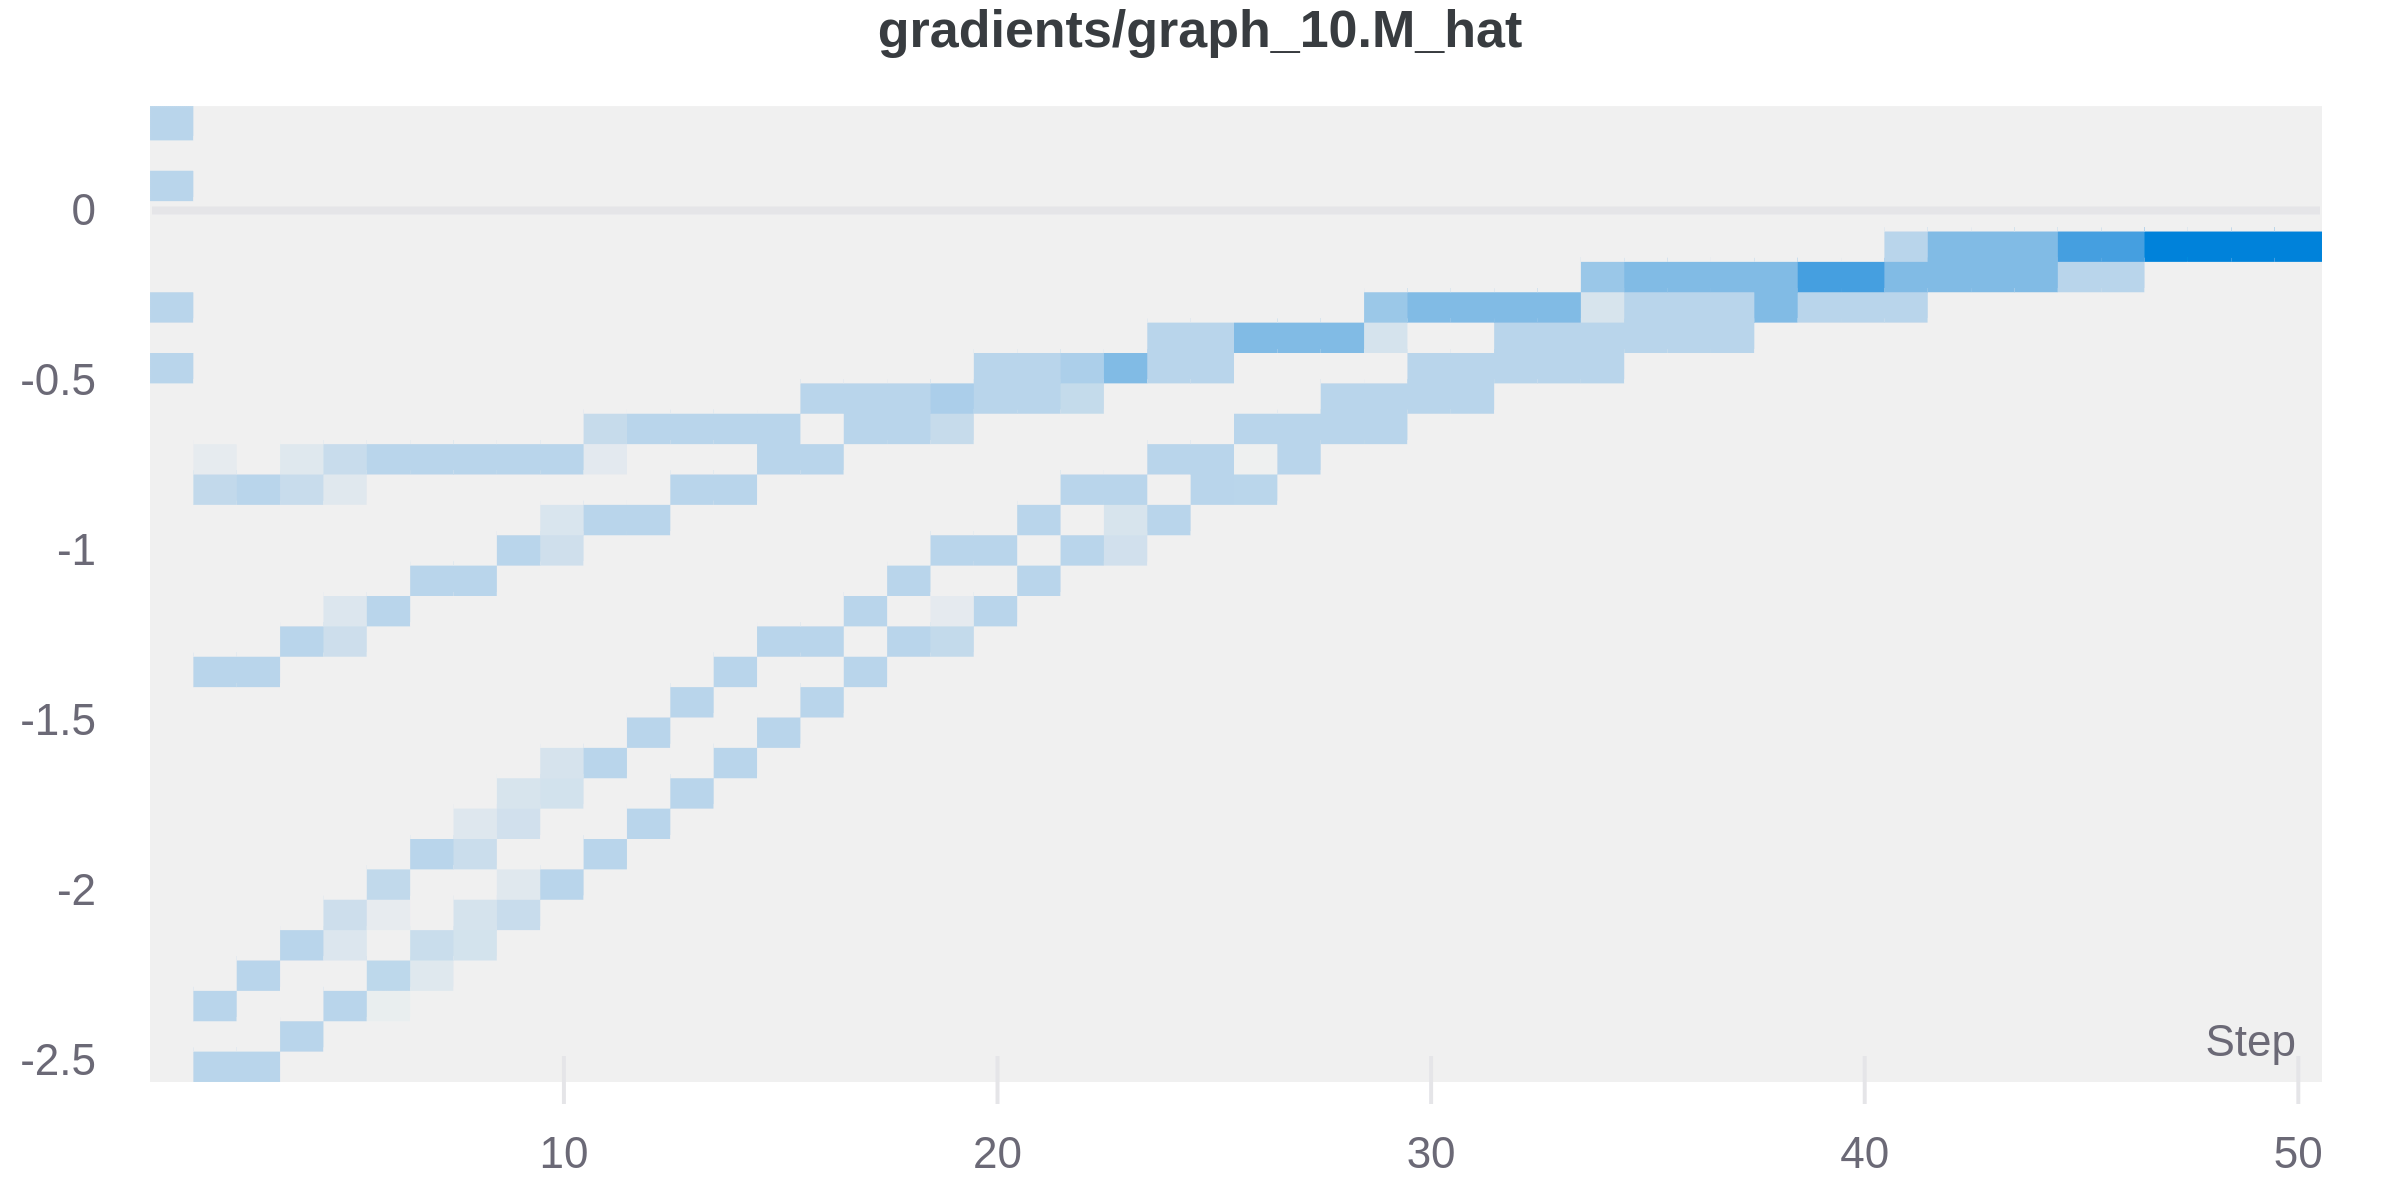

**Experiment 2**

Здесь будут графики изменения значений элементов матрицы $G$, наподобии графиков выше:

- add graphics

**Experiment 3**


(Сделать графики более читаемыми, проверить корректность)

- Normalized results

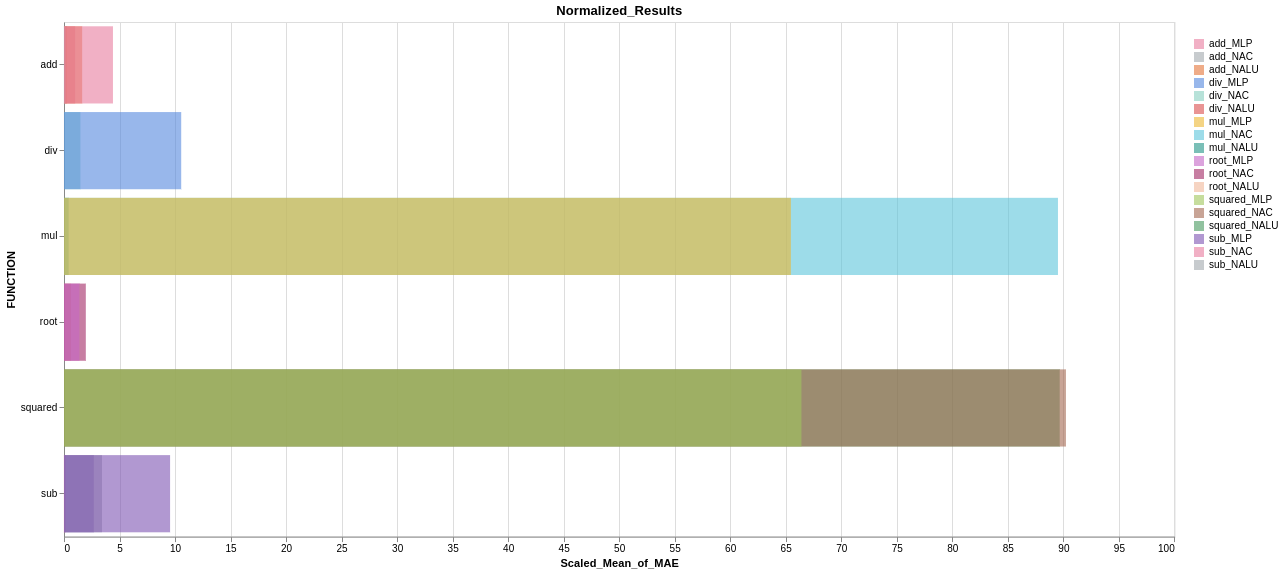

- Results

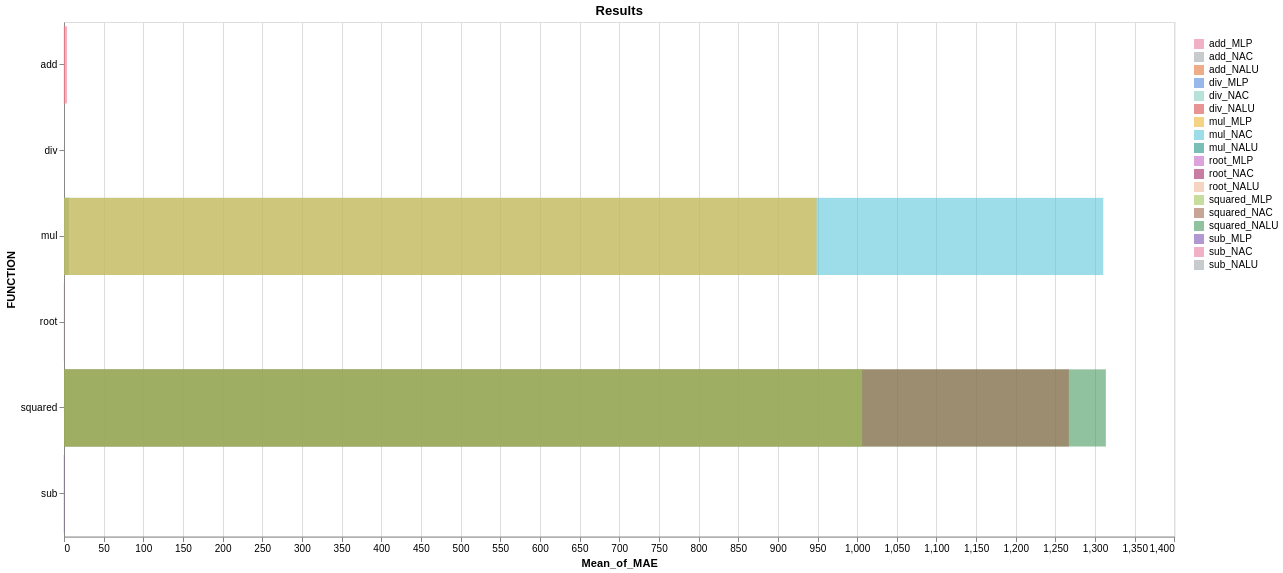